In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
# IMPORT THƯ VIỆN CẦN THIẾT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# NẠP DỮ LIỆU
df = pd.read_csv("Data_Python_ST3/BT2/Customer_Behaviour.csv")
print(" Kích thước dữ liệu:", df.shape)
print(df.head())

 Kích thước dữ liệu: (400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
# KHẢO SÁT & XỬ LÝ DỮ LIỆU
print("\nThông tin dữ liệu:")
print(df.info())

# Loại bỏ cột không cần thiết (nếu có)
drop_cols = ['customerID'] if 'customerID' in df.columns else []
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Điền giá trị thiếu
df.fillna(df.mode().iloc[0], inplace=True)

# Mã hóa các cột phân loại (object)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Xác định biến đầu vào (X) và đầu ra (y)
target_col = 'Churn' if 'Churn' in df.columns else df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [ ]:
# XÂY DỰNG MÔ HÌNH NAIVE BAYES
# GaussianNB – cho dữ liệu liên tục
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("\n=== Gaussian Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

# MultinomialNB – thường dùng cho dữ liệu đếm (text)
mnb = MultinomialNB()
mnb.fit(abs(X_train), y_train)
y_pred_mnb = mnb.predict(abs(X_test))

print("\n=== Multinomial Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

# BernoulliNB – cho dữ liệu nhị phân (0/1)
bnb = BernoulliNB()
bnb.fit((X_train > 0).astype(int), y_train)
y_pred_bnb = bnb.predict((X_test > 0).astype(int))

print("\n=== Bernoulli Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))


=== Gaussian Naive Bayes ===
Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80


=== Multinomial Naive Bayes ===
Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        52
           1       1.00      0.07      0.13        28

    accuracy                           0.68        80
   macro avg       0.83      0.54      0.47        80
weighted avg       0.78      0.68      0.57        80


=== Bernoulli Naive Bayes ===
Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        52
           1       0.82      0.50      0.62        28

    accuracy                          

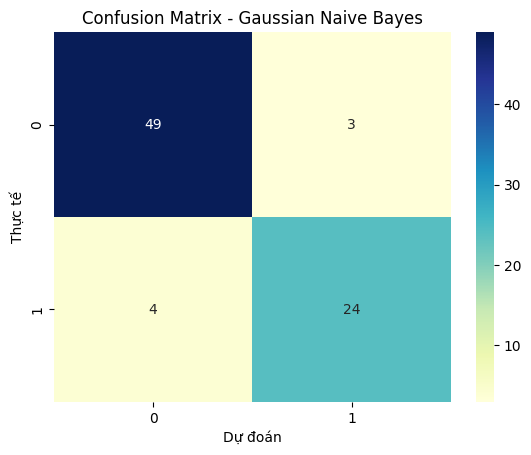

In [ ]:

# CONFUSION MATRIX (Gaussian tốt nhất)
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

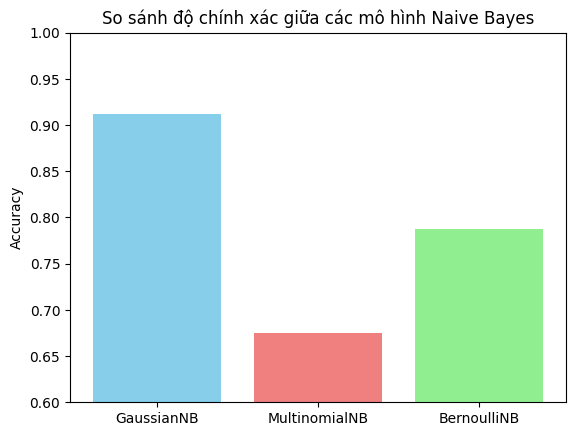

In [ ]:
# SO SÁNH CÁC BIẾN THỂ CỦA NAIVE BAYES
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracies = [
    accuracy_score(y_test, y_pred_gnb),
    accuracy_score(y_test, y_pred_mnb),
    accuracy_score(y_test, y_pred_bnb)
]

plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("So sánh độ chính xác giữa các mô hình Naive Bayes")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()